# Formal resolution

This is an attempt to formally find the position of the photographer.
It doesn't go well very quickly as one can see below.

On fact, even the first step, finding the position of the lens, seems not achievable in a formal manner.


## Compute the position of the lens

Compute the position of the center of the lens (O) based on the positions of:
* the photographer (P)
* three summits (A, C, E)

The lens is assumed to be orthogonal with OP.
A', C' and E' are the projection of A, C and E on the lens.

In [11]:
from sympy import symbols, diff, init_printing, solve
from sympy.geometry import Point, Line, Segment, intersection
init_printing(pretty_print=True, use_unicode=True)

Let's define the various points:

In [12]:
xA, yA, xC, yC, xE, yE, xP, yP = symbols('xA yA xC yC xE yE xP yP')
A = Point(xA, yA)
C = Point(xC, yC)
E = Point(xE, yE)
P = Point(xP, yP)

### Step1: Compute the orientation of the lens

In this step, the lens is assumed to cross the middle of $PA$. So, $A'$ is an invariant in this step.

Then, let's find the position of $C'$ to ensure that $A'B'/A'C'$ is as close as possible to $DeltaAB/DeltaAC$. ($DeltaAB$ and $DeltaAC$ are the distance, on the picture, between $A$ and $B$ or $A$ and $C$.)

Note that if the photographer's position is right, we should have $A'B'/A'C' = DeltaAB/DeltaAC$.

At the end of this step, we'll have found the right orientation of the lens. Though, the position of the lens will still be unknown, though.

A' is in the middle of P and A
:

In [13]:
A_ = A.midpoint(P)

E' is somewhere between P and E depending on the value alpha:

In [14]:
alpha = symbols('alpha')
E_ = Point((1-alpha)*P.x + alpha*E.x,
           (1-alpha)*P.y + alpha*E.y)

Once we have A' and E', let's find C' which is at the intersection of A'E' (the lens) and EP (the light beam): 

In [15]:
C_ = intersection(Line(P, C), Line(A_, E_))[0]

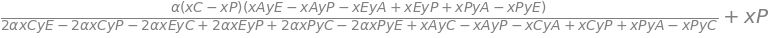

In [16]:
C_.x

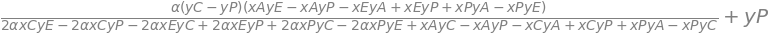

In [17]:
C_.y

Now, let's find $alpha$ such as the orientation of the lens is such as the relative distance between the summits is respected compared to what we have on the picture.

In order to do that, we want to minimize the absolute value of the error defined as follow (if the photographer is at the right position, we should get error=0).
$$error = (A'E'/A'C') - ((deltaE-deltaA)/(deltaC-deltaA))$$

Let's study the variation of $error(alpha)$ by looking at the derivate.
$$d(error)/d(alpha) = d(A'E'/A'C')/d(alpha)$$

As A'E' and A'C' are colinear, there exist gamma such as:
$$A'E' = gamma*(xE'-xA')$$
$$A'C' = gamma*(xC'-xA')$$

Then, we can simplify further:
$$d(error)/d(alpha) = d((xE'-xA') / (xC'-xA'))/d(alpha)$$

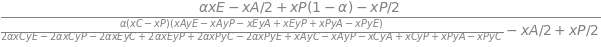

In [18]:
derror = (E_.x-A_.x) / (C_.x-A_.x)
derror

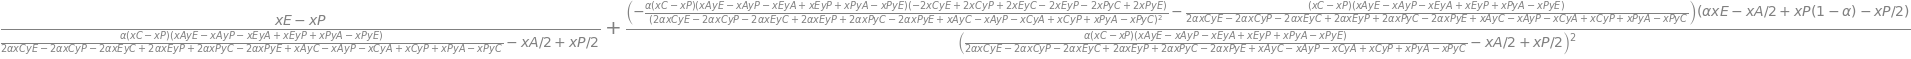

In [19]:
differror = diff(derror, alpha)
differror

In [20]:
(differrornum, differrordenum) = differror.as_numer_denom()
differrornum.collect(alpha)

Well well well...

$d(error)/d(alpha)$ has a numerator in $alpha^4$. Not easy to solve...

Dead end!